<span style='font-family:Georgia'>

<h1><span style='background:blue'><span style='color:white'> Session Objectives</span></span></h1>


1. ### What is Regression
- ### Types of Regressions
- ### What is Linear Regression
- ### Applying Linear Regression to Head-Brain Dataset

</span>

## 1. What is Regression

<span style='font-family:Bookman Old Style'>
    
**Regression Function:** a mathematical relationship enabling us to predict what values of one variable (Y) correspond to given values of another variable (X).
-  Y:  is referred to as the <span style='color:red'> *dependent variable,</span> the <span style='color:red'>response variable</span> or the <span style='color:red'>predicted variable*</span>.
-  X: is referred to as the <span style='color:red'> *independent variable,</span> the <span style='color:red'>explanatory variable</span> or the <span style='color:red'>predictor variable*</span>


Thus Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent and independent variable.


</span>

<span style='font-family:Bookman Old Style'>

## 2. Types of Regressions

- Linear Regression
- Logistic Regression
- Polynomial Regression
</span>

<span style='font-family:Bookman Old Style'>

## 3. What is Linear Regression?

### Linear Regression Theory

The term `“linearity”` in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.
![LinearRegression1](Images/LinearRegression1.png)
The equation of the above line is :

![image.png](Images/LinearRegressionFormulae.png)

Where ***$\beta_0$*** is the intercept and **$\beta_1$** is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The $Y_i$ and $X_i$ variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept($\beta_0$) and slope($\beta_1$). 

There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.


Linear Regression is one of the most simple yet widely used statistical Machine Learning technique. The linear regression machine learning algorithm tries to map one or more independent variable (features) to a dependent variable (scalar output). In this session, you will be learning about:
- Different types of linear regression in machine learning.
- A bit of statistics/mathematics behind it.
- And what kind of problems you can solve with linear regression.
    
</span>

## 4. Applying Linear Regression to Head-Brain Dataset

### The below steps should be consider while applying any machine learning algorithm

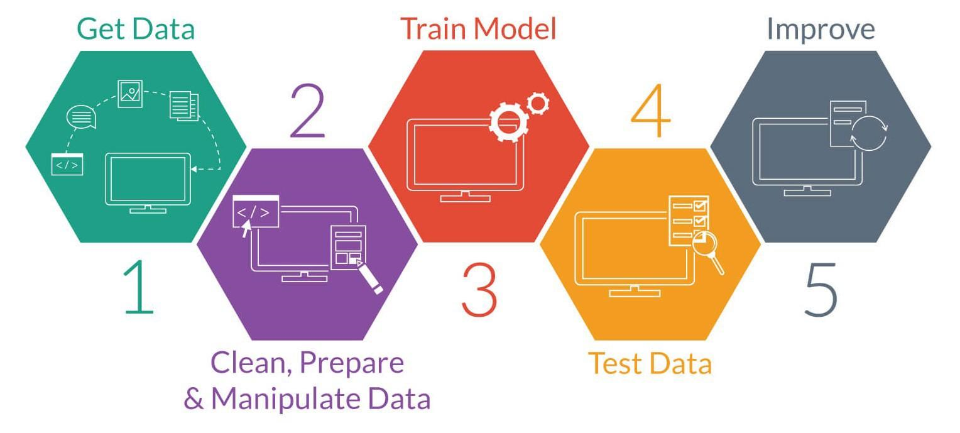

### <span style='color:green'> Step 1: Get the Data </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brain_df = pd.read_csv('datasets/headbrain.csv')
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### <span style='color:#4a00e0'> Step 2: Clean Prepare and Manipulate Data </span>

In [3]:
# Checking dimensionality of the Head Brain DataFrame
brain_df.shape

(237, 4)

By above output we can say there are total 237 rows and 4 columns

In [4]:
# printing information about Head Brain dataframe
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
# Checking for missing data in the Head Brain dataframe
brain_df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

By above info we can say that there is no missing data in our dataframe

In [6]:
# Checking for any duplicate values in the Head Brain dataframe
brain_df.duplicated().sum()

0

By above info we can say that there are no duplicate values

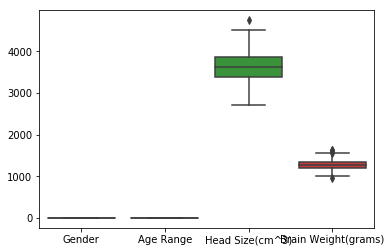

In [7]:
sns.boxplot(data = brain_df)

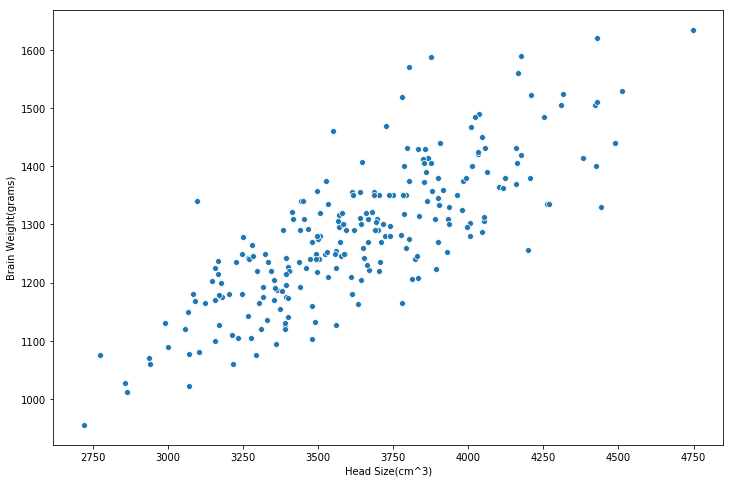

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=brain_df['Head Size(cm^3)'],y=brain_df['Brain Weight(grams)'])
plt.show()

By obseving the above scatter plot Head Size vs Brain Weight are linearly coorelated so we take as the **Head Size as independent variable** and **Brain Weight as dependent variable** or target variable.

### <span style='color:#f16529'> Step 3: Train the Model </span>

##  <span style='color:#24FE41'> Method 1: Linear Regression Model using Mathematical </span>

In [9]:
X = brain_df['Head Size(cm^3)'].values
Y = brain_df['Brain Weight(grams)'].values

## $\ Y = MX + C $

We have to find the intercept $\beta_0$ or C and Slope $\beta_1$ or M by using below formula

## $\ Slope M = \sum_{i=0}^{len(X)} \frac{(X_i - X_{mean} ) * (Y_i - Y_{mean}) }{(X_i - X_{mean} ) ^ 2}$

In [10]:
x_mean = X.mean() 
y_mean = Y.mean()

n = len(X) 
num = 0
den = 0

for i in range(n):
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    den += (X[i] - x_mean) ** 2

M = (num) / (den)
print("Slope M: ",M)

C = y_mean - M * x_mean
print('X_Intercept C: ',C)

Slope M:  0.26342933948939945
X_Intercept C:  325.57342104944223


In [11]:
y_pred = M * X + C # Calculating predicted values

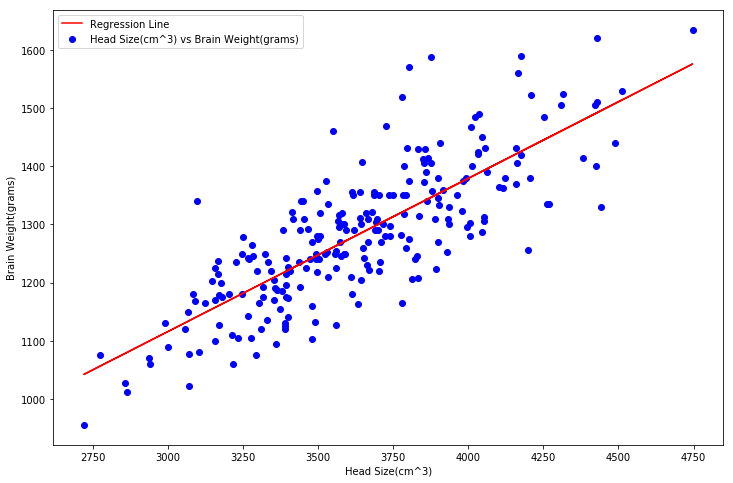

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y,label = 'Head Size(cm^3) vs Brain Weight(grams)',color = 'b') # Plotting scatter plot
plt.plot(X,y_pred,'r',label='Regression Line') # Plotting the Regressing by using X and predicted values
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use Root Mean Squared Error and Coefficient of Determination

## Calculating Coefficient of Determination $(R ^2)$

It is the mean of the squared errors and is calculated as:

## $\ R ^2 = \sum_{i=0}^{len(Y)} \frac{(Y_{Predicted}-Y_{mean}) ^ 2}{(Y_i - Y_{mean}) ^ 2}$

$R ^2$ is the total sum of squares and total sum of squares of residuals.

$R ^2$ Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find $R ^2$ Score.

In [13]:
num = 0
den = 0
for i in range(n):
    y_pred = M * X[i] + C
    num += ((y_pred - y_mean) ** 2)
    den += ((Y[i] - y_mean) ** 2)
R_2 = num/den
print('Coefficient of Determination R^2 is:',R_2)

Coefficient of Determination R^2 is: 0.6393117199570001


0.63 is not so bad. So Now we have Sucessfully implemented Simple Linear Regression Model using Ordinary Least Square Method.

## Calculating Root Mean Squared Error (RMSE)
Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

$\ RMSE = \sum_{i=0}^{len(Y)} \sqrt{\frac{(Y_{Pred}-Y_{mean}) ^ 2}{len(X)}}$

Here $y_{pred}$ is the predicted output values.

In [14]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = C + M * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print('Root Mean Squares Error is:',rmse)

Root Mean Squares Error is: 72.1206213783709


### <span style='color:#CAC531'> Step 4: Test the Model </span>

In [15]:
test = M * 4512 + C
print('Tested Head size value 4512 using our Linear Regression model is:',test)
print('Actual value for Head size 4512 is:',1530)

Tested Head size value 4512 using our Linear Regression model is: 1514.1666008256125
Actual value for Head size 4512 is: 1530


### <span style='color:#2c3e50'> Step 5: Improve the Model </span>

We can improve our model by using other algorithms we discussing comming sessions

## <span style='color:#f05053'> Method 2: Linear Regression Model using Sklearn </span>

In [16]:
brain_df = pd.read_csv('datasets/headbrain.csv')
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [17]:
X = brain_df['Head Size(cm^3)'].values
Y = brain_df['Brain Weight(grams)'].values

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((len(X), 1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y Prediction
Y_pred = reg.predict(X)

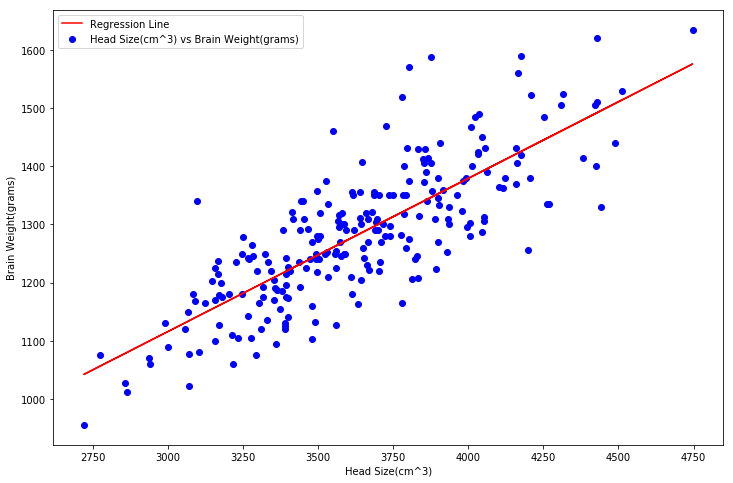

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y,label = 'Head Size(cm^3) vs Brain Weight(grams)',color = 'b') # Plotting scatter plot
plt.plot(X,Y_pred,'r',label='Regression Line') # Plotting the Regressing by using X and predicted values
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [21]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squares Error is:',np.sqrt(mse))

Root Mean Squares Error is: 72.1206213783709


In [22]:
r2_score = reg.score(X, Y)
print('Coefficient of Determination R^2 is:',r2_score)

Coefficient of Determination R^2 is: 0.639311719957


You can see that this exactly equal to model we built from scratch, but simpler and less code